#Exercise




Estimate the location from WIFI Signal Strength




The dataset has 2,000 rows and 8 columns. The data contains wifi signal strength observed from 7 wifi devices on a smartphone collected in an indoor space which could be used to estimate the location in one of the four rooms.




You can use ANN analysis for this exerise to improve the ANN performance.

Artificial Neural Network (ANN)

In [84]:
#Mounting our Drive to Google Colab
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [85]:
path = '/drive/MyDrive/Colab Notebooks/Deep Learning Lab/Lab2/wifi.csv'
df = pd.read_csv(path)

In [86]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

#Dataset for classifcation
df

,Wifi 1,Wifi 2,Wifi 3,Wifi 4,Wifi 5,Wifi 6,Wifi 7,Room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1
...,...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4


In [87]:
df.shape

(2000, 8)

In [88]:
#LOading data into pandas dataframe
df.head().T #Transpose

,0,1,2,3,4
Wifi 1,-64,-68,-63,-61,-63
Wifi 2,-56,-57,-60,-60,-65
Wifi 3,-61,-61,-60,-68,-60
Wifi 4,-66,-65,-67,-62,-63
Wifi 5,-71,-71,-76,-77,-77
Wifi 6,-82,-85,-85,-90,-81
Wifi 7,-81,-85,-84,-80,-87
Room,1,1,1,1,1


In [89]:
df.columns #easier to copy and paste the column

Index(['Wifi 1', 'Wifi 2', 'Wifi 3', 'Wifi 4', 'Wifi 5', 'Wifi 6', 'Wifi 7',
       'Room'],
      dtype='object')

In [90]:
dummy = pd.get_dummies(df['Room'])
pd.concat([df['Room'],dummy],axis=1)

,Room,1,2,3,4
0,1,1,0,0,0
1,1,1,0,0,0
2,1,1,0,0,0
3,1,1,0,0,0
4,1,1,0,0,0
...,...,...,...,...,...
1995,4,0,0,0,1
1996,4,0,0,0,1
1997,4,0,0,0,1
1998,4,0,0,0,1


In [91]:
X = df.drop('Room', axis = 1)
Y = dummy

In [92]:
print(X)
print(Y)

      Wifi 1  Wifi 2  Wifi 3  Wifi 4  Wifi 5  Wifi 6  Wifi 7
0        -64     -56     -61     -66     -71     -82     -81
1        -68     -57     -61     -65     -71     -85     -85
2        -63     -60     -60     -67     -76     -85     -84
3        -61     -60     -68     -62     -77     -90     -80
4        -63     -65     -60     -63     -77     -81     -87
...      ...     ...     ...     ...     ...     ...     ...
1995     -59     -59     -48     -66     -50     -86     -94
1996     -59     -56     -50     -62     -47     -87     -90
1997     -62     -59     -46     -65     -45     -87     -88
1998     -62     -58     -52     -61     -41     -90     -85
1999     -59     -50     -45     -60     -45     -88     -87

[2000 rows x 7 columns]
      1  2  3  4
0     1  0  0  0
1     1  0  0  0
2     1  0  0  0
3     1  0  0  0
4     1  0  0  0
...  .. .. .. ..
1995  0  0  0  1
1996  0  0  0  1
1997  0  0  0  1
1998  0  0  0  1
1999  0  0  0  1

[2000 rows x 4 columns]


In [93]:
Y.value_counts()

1  2  3  4
0  0  0  1    500
      1  0    500
   1  0  0    500
1  0  0  0    500
dtype: int64

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.20, random_state = 0)

In [95]:
print("X_train shape",X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

X_train shape (1600, 7)
(1600, 4)
(400, 7)
(400, 4)


In [96]:
from keras.models import Sequential
from keras.layers import Dense

In [97]:
# Building the sequential model

L1 = 100
L2 = 100

model = Sequential()
model.add(Dense(L1,input_dim=7,activation='relu')) #input_dim always for first time only
model.add(Dense(L2,activation = 'relu')) #using 100 instead for L2

# output layer (multiple class)
model.add(Dense(4, activation='softmax'))

In [98]:
#compiling the sequential model
model.compile(loss = 'categorical_crossentropy', metrics=['accuracy'], optimizer = 'adam')

In [99]:
# training the model for 10 epochs (number of iterations)
history=model.fit(X_train, Y_train, epochs=10, batch_size=100, validation_data = (X_test,Y_test)) #try logistic regression and neural network

Epoch 1/10
16/16 [==============================] - 1s 18ms/step - loss: 5.2511 - accuracy: 0.4106 - val_loss: 1.3985 - val_accuracy: 0.5225
Epoch 2/10
16/16 [==============================] - 0s 6ms/step - loss: 0.9251 - accuracy: 0.6119 - val_loss: 0.5901 - val_accuracy: 0.7650
Epoch 3/10
16/16 [==============================] - 0s 5ms/step - loss: 0.4058 - accuracy: 0.8656 - val_loss: 0.3404 - val_accuracy: 0.9025
Epoch 4/10
16/16 [==============================] - 0s 5ms/step - loss: 0.2553 - accuracy: 0.9306 - val_loss: 0.2741 - val_accuracy: 0.9200
Epoch 5/10
16/16 [==============================] - 0s 5ms/step - loss: 0.1956 - accuracy: 0.9500 - val_loss: 0.2294 - val_accuracy: 0.9250
Epoch 6/10
16/16 [==============================] - 0s 6ms/step - loss: 0.1695 - accuracy: 0.9581 - val_loss: 0.1944 - val_accuracy: 0.9400
Epoch 7/10
16/16 [==============================] - 0s 6ms/step - loss: 0.1535 - accuracy: 0.9606 - val_loss: 0.1835 - val_accuracy: 0.9450
Epoch 8/10
16/16 [=

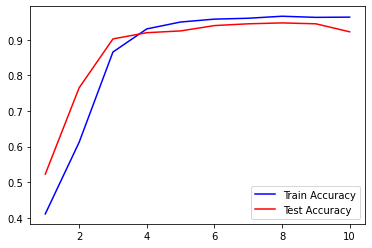

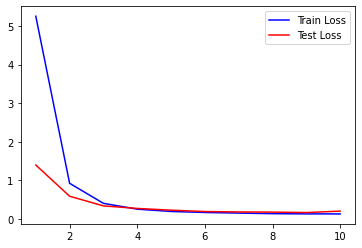

In [100]:
import matplotlib.pyplot as plt

acc2 = history.history['accuracy']
val_acc = history.history ['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc2)+1)

plt.plot(epochs, acc2,'b',label='Train Accuracy')
plt.plot(epochs, val_acc,'r',label='Test Accuracy')
plt.legend()
plt.figure()




plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()